# Introduction

In this section of the project I will do some more exploratory data analysis, but this time using visualizations to aid in the exploration.

I will be using the dataset that was gathered from the Space X API in this section.

Start by importing the dataset in a dataframe:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/launch_data_api_with_target.csv')

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Exploring the Data with Visualizations

The first thing I want to look at is to see how th `Flight_Number` and `Payload` variables affect the launch outcome.

Suppose we plot `Flight_Number` vs. `Payload_Mass`:

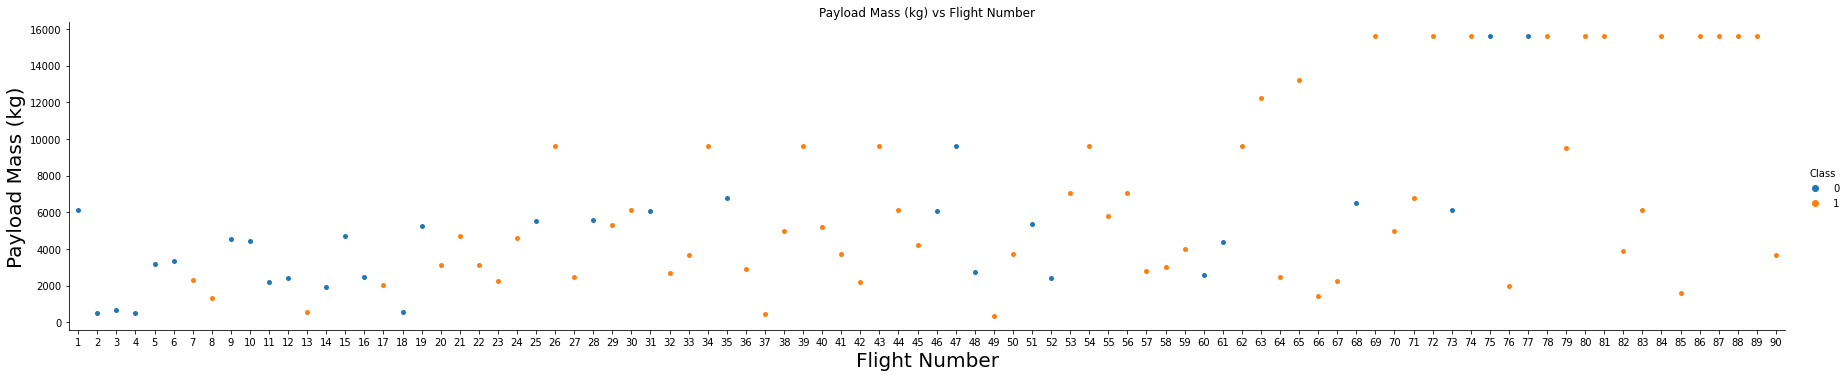

In [2]:
sns.catplot(y='PayloadMass', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass (kg)', fontsize=20)
plt.title('Payload Mass (kg) vs Flight Number')
plt.show()

From this plot, we can see that as the flight number increases, the likelihood of landing success seems to increase. We can see this from the higher proportion of orange points on the right side of the plot than on the left. As the payload mass increases, it looks like the success rate goes up too. This could be a coincidence, rather than a correlation. It could be that as Space X became more confident in their ability to land the rocket, they put a larger payload.

### Task 1

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>.

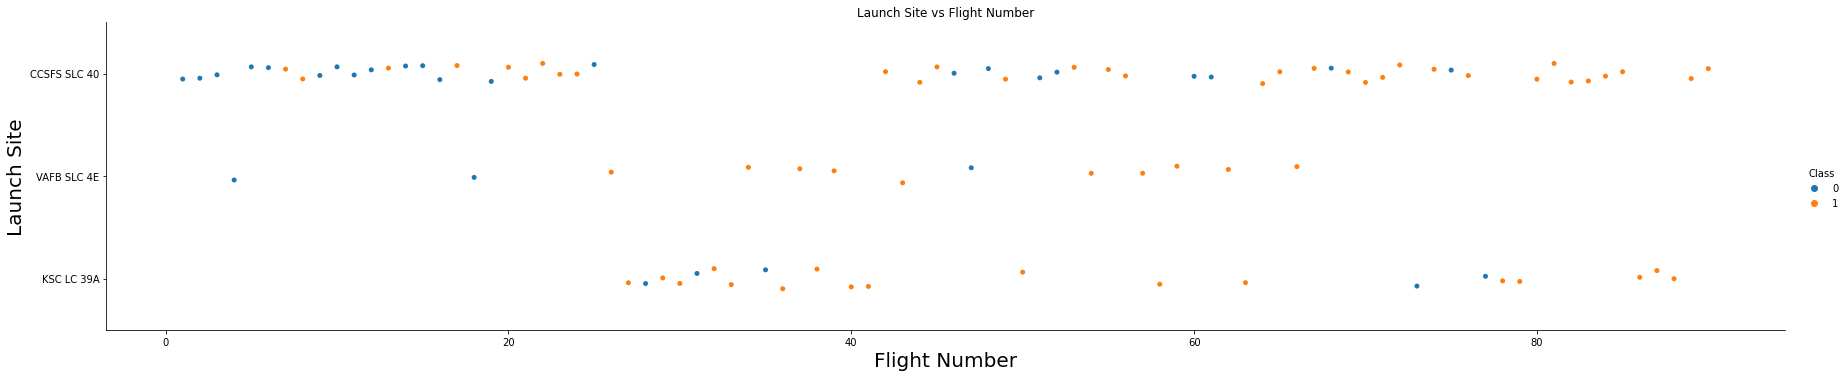

In [3]:
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.title('Launch Site vs Flight Number')
plt.show()

There is a trend in the success rate for different launch sites as well.

### Task 2: Visualize the relationship between Payload and Launch Site

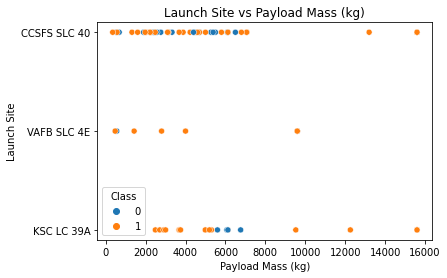

In [4]:
sns.scatterplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Launch Site vs Payload Mass (kg)')
plt.show()

It is hard to determine a pattern here because most launches have payloads less than 8000 kg. We can see, however, that launches at VAFB did not have a payload mass more than 10000 kg.

### TASK  3: Visualize the relationship between success rate of each orbit type
Let's create a bar chart for the sucess rate of each orbit


In [5]:
success_rate = df[['Orbit', 'Class']].groupby(by='Orbit').mean().reset_index()
success_rate.rename(columns={'Orbit': 'Orbit', 'Class': 'Success Rate'}, inplace=True)
success_rate

,Orbit,Success Rate
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


In [6]:
df.value_counts('Orbit')

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
GEO       1
HEO       1
SO        1
dtype: int64

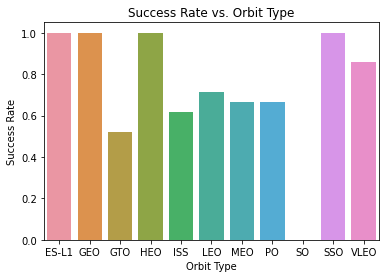

In [7]:
sns.barplot(data=success_rate, x='Orbit', y='Success Rate')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate vs. Orbit Type')
plt.show()

We can see that the orbits with the highest success rates are ES-L1, GEO, HEO, and SSO. The lowest is SO, but that is because we only have one instance of an SO orbit and it is a failed landing. I'm not rocket scientist, so it could be that the GTO, ISS, LEO, MEO, and PO orbits represent more difficult orbits to land a rocket from.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

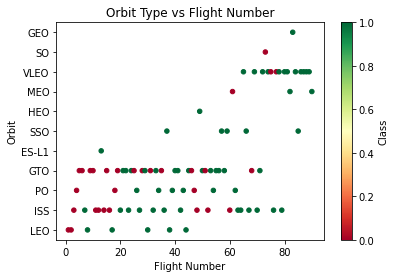

In [8]:
df.plot(kind='scatter', x='FlightNumber', 
        y='Orbit', c='Class', colormap='RdYlGn', sharex=False)
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Orbit Type vs Flight Number')
plt.show()

It looks like there is a relationship between flight number and orbit type. As the flight number increases, we see an increase in the success rate of the LEO orbits. It looks like there is a slight correlation between orbit, flight number, and success. There are more VLEO orbits on the right side of the graph (higher flight number) and they have a high success rate.

### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type:

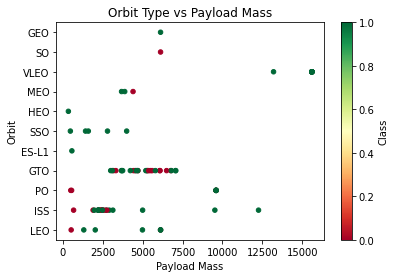

In [9]:
df.plot(kind='scatter', x='PayloadMass', 
        y='Orbit', c='Class', colormap='RdYlGn', sharex=False)
plt.xlabel('Payload Mass')
plt.ylabel('Orbit')
plt.title('Orbit Type vs Payload Mass')
plt.show()

With heavy payloads, we see higher success for ISS, LEO, and PO orbits. 

### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

success_rate_year = df[['Year', 'Class']].groupby(by='Year').mean().reset_index()

success_rate_year.rename(columns={'Year': 'Year', 'Class': 'Success Rate'}, inplace=True)

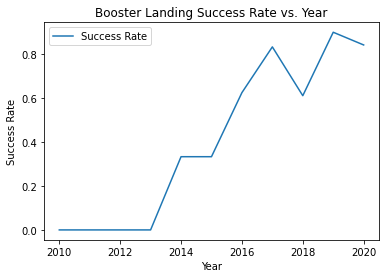

In [11]:
success_rate_year.plot(kind='line', x='Year', y='Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Booster Landing Success Rate vs. Year')
plt.show()

There is a clear positive relationship between year and success rate.

## Feature Engineering

### TASK  7: Create dummy variables to categorical columns

We will be selecting certain columns to be used in our machine learning model in the future.

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
               'Flights', 'GridFins', 'Reused', 'Legs',
               'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]

features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0


In [13]:
features_one_hot = pd.get_dummies(features)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
features_one_hot.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Class', 'Orbit_ES-L1', 'Orbit_GEO',
       'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO',
       'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025'

### TASK 8: Cast All Numeric Columns to float64

In [15]:
# now cast the whole dataframe into float64
features_one_hot = features_one_hot.astype(float)

features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 81, dtype: object

In [16]:
features_one_hot.to_csv('datasets/launch_data_api_one_hot_with_target.csv', index=False)